#### Steganography

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv

##### Encoder

In [2]:
def steganography_encode(input_image, input_text, bit_plane):
    # Check if the message can be encoded in the image
    if(len(input_text) > (input_image.size // 8)):
        print(len(input_text), (input_image.size // 8))
        raise ValueError("Insufficient bytes")

    # Get the bits of the input text
    input_ascii = np.frombuffer(input_text.encode(), 'S1').view(np.uint8)
    input_bits = np.unpackbits(input_ascii)

    # Flatten input image array
    output_flat = np.copy(input_image).ravel()
    output_use = output_flat[:len(input_bits)]

    # You can set [0,1]:
    # 1: x = x | pos
    # 0: x = x & ~pos
    mask_one = 1 << bit_plane
    mask_zero = ~mask_one

    output_flat[:len(input_bits)] = np.where(
        input_bits, output_use | mask_one, output_use & mask_zero)

    # Recover image shape
    output_image = output_flat.reshape(input_image.shape)
    return output_image


##### Decoder

In [3]:
def steganography_decode(input_image, bit_plane):
    # Get k Least Significant Bit
    mask = 1 << bit_plane
    #input_bits = (input_image & mask).ravel() // bit_plane
    input_bits = (input_image & mask).ravel() // mask

    # Broadcast to array nx8 Dim
    output_bits = input_bits.reshape((-1, 8))
    output_bytes = np.sum(output_bits * [128, 64, 32, 16, 8, 4, 2, 1], axis=1)

    output_text = ''
    for ascii in output_bytes:
        if ascii == 0:
            break
        output_text += chr(ascii)

    return output_text

##### Bit Plane

In [4]:
def show_bit_planes(img, planes=[0, 1, 2, 7]):
    plt.figure(figsize=(20, 20))

    rows = len(planes) + 1
    cols = 4

    index = 0
    for plane in planes:
        img_plane = (img >> plane) & 1
        img_plane = np.where(img_plane, 255, 0)

        img_r = np.zeros(img_plane.shape)
        img_r[:, :, 0] = img_plane[:, :, 0]

        img_g = np.zeros(img_plane.shape)
        img_g[:, :, 1] = img_plane[:, :, 1]

        img_b = np.zeros(img_plane.shape)
        img_b[:, :, 2] = img_plane[:, :, 2]

        plt.subplot(rows, cols, (index*cols) + 1)
        plt.axis('off')
        plt.imshow(img, alpha=0.25)
        plt.imshow(img_plane)

        plt.subplot(rows, cols, (index*cols) + 2)
        plt.axis('off')
        plt.imshow(img_plane)
        plt.imshow(img_r.astype('uint8'))

        plt.subplot(rows, cols, (index*cols) + 3)
        plt.axis('off')
        plt.imshow(img_plane)
        plt.imshow(img_g.astype('uint8'))

        plt.subplot(rows, cols, (index*cols) + 4)
        plt.axis('off')
        plt.imshow(img_plane)
        plt.imshow(img_b.astype('uint8'))

        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        index += 1


##### Test

In [5]:
input_path_image = "./images/baboon.png"
input_path_text = "./data/medium.txt"

bit_plane = 0
input_image = cv.imread(input_path_image, cv.IMREAD_COLOR)
input_image = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)


input_text = ''
with open(input_path_text, 'r') as file:
    input_text = file.read() + chr(0)

encode_image = steganography_encode(input_image, input_text, bit_plane)
decode_text = steganography_decode(encode_image, bit_plane)

Text(0.5, 1.0, 'Encode image')

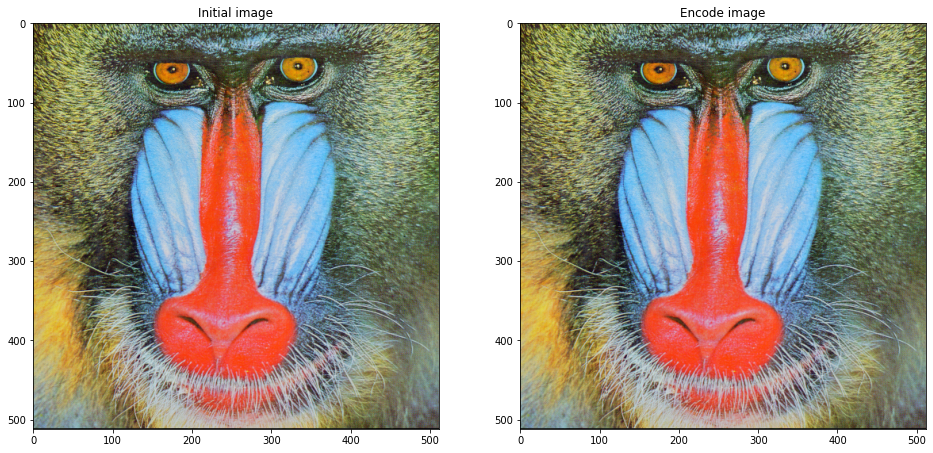

In [6]:
plt.figure(figsize=(16, 10))

rows, cols = 1, 2

# showing image
plt.subplot(rows, cols, 1)
plt.imshow(input_image)
plt.title("Initial image")

plt.subplot(rows, cols, 2)
plt.imshow(encode_image)
plt.title("Encode image")

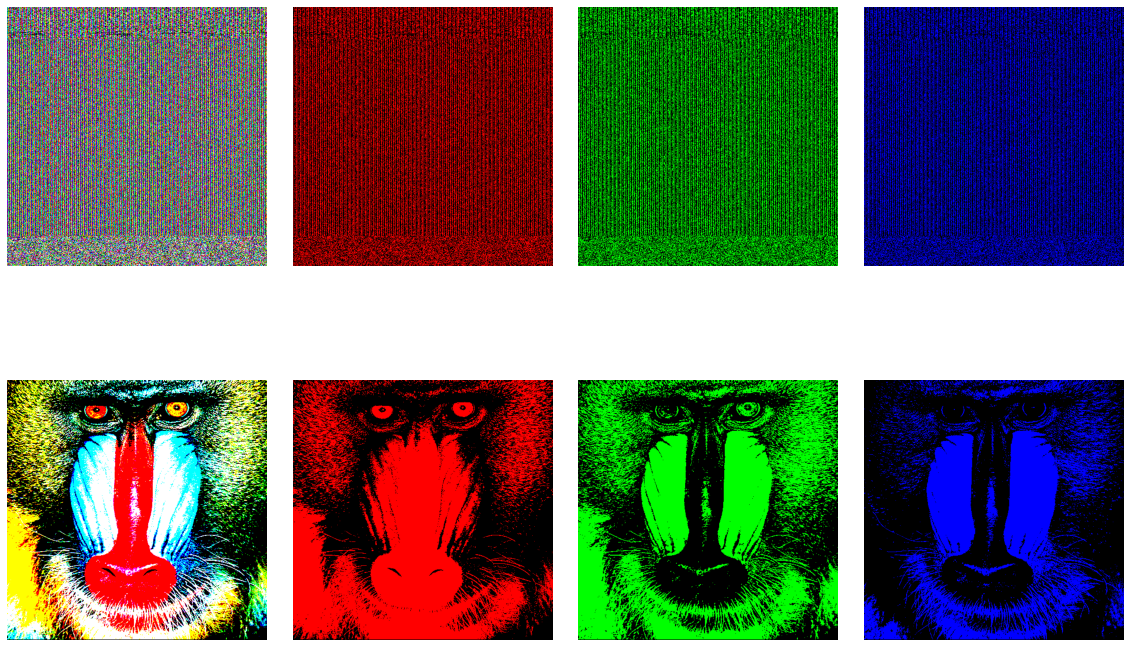

In [7]:
show_bit_planes(encode_image, [0,7])